In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('world_population.csv')

In [3]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [6]:
df.shape

(234, 17)

In [7]:
print(F"Amount of duplicates: {df.duplicated().sum()}")

Amount of duplicates: 0


In [8]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [9]:
df.rename(columns={
   '2022 Population' : 'Population_2022',
    '2020 Population' : 'Population_2020',
    '2015 Population' : 'Population_2015',
    '2010 Population' : 'Population_2010',
    '2000 Population' : 'Population_2000',
    '1990 Population' : 'Population_1990',
    '1980 Population' : 'Population_1980',
    '1970 Population' : 'Population_1970',
    'Area (km²)' : 'Area_km2',
    'Density (per km²)' : 'Density_per_km2',
    'Growth Rate' : 'Growth_Rate',
    'World Population Percentage' : 'World_Population_Percentage'
}, inplace = True)
print(df.columns)

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       'Population_2022', 'Population_2020', 'Population_2015',
       'Population_2010', 'Population_2000', 'Population_1990',
       'Population_1980', 'Population_1970', 'Area_km2', 'Density_per_km2',
       'Growth_Rate', 'World_Population_Percentage'],
      dtype='object')


In [10]:
#Calculate Population Changes
df['Change_2022_2020'] = df['Population_2022'] - df['Population_2022']
df['Change_2020_2015'] = df['Population_2020'] - df['Population_2015']
df['Change_2015_2010'] = df['Population_2015'] - df['Population_2010']
df['Change_2010_2000'] = df['Population_2010'] - df['Population_2000']
print(df[['Country/Territory','Change_2022_2020','Change_2020_2015','Change_2015_2010','Change_2010_2000']])

     Country/Territory  Change_2022_2020  Change_2020_2015  Change_2015_2010  \
0          Afghanistan                 0           5218731           5563827   
1              Albania                 0            -15632            -30918   
2              Algeria                 0           3908512           3686810   
3       American Samoa                 0             -5179             -3481   
4              Andorra                 0              5954               227   
..                 ...               ...               ...               ...   
229  Wallis and Futuna                 0              -527              -960   
230     Western Sahara                 0             64224             78528   
231              Yemen                 0           3767501           3772599   
232             Zambia                 0           2679485           2456144   
233           Zimbabwe                 0           1514729           1315166   

     Change_2010_2000  
0             8

In [11]:
#Calculate Growth Percentages
df['Growth_percentage_2022_2020'] = (df['Change_2022_2020'] / df['Population_2020']) * 100
df['Growth_percentage_2020_2015'] = (df['Change_2020_2015']/ df['Population_2015']) * 100
df['Growth_percentage_2015_2010'] = (df['Change_2015_2010']/ df['Population_2010']) * 100
df['Growth_percentage_2010_2000'] = (df['Change_2010_2000']/ df['Population_2000']) * 100
print(df[['Country/Territory','Growth_percentage_2022_2020','Growth_percentage_2020_2015','Growth_percentage_2015_2010','Growth_percentage_2010_2000']])

     Country/Territory  Growth_percentage_2022_2020  \
0          Afghanistan                          0.0   
1              Albania                          0.0   
2              Algeria                          0.0   
3       American Samoa                          0.0   
4              Andorra                          0.0   
..                 ...                          ...   
229  Wallis and Futuna                          0.0   
230     Western Sahara                          0.0   
231              Yemen                          0.0   
232             Zambia                          0.0   
233           Zimbabwe                          0.0   

     Growth_percentage_2020_2015  Growth_percentage_2015_2010  \
0                      15.461304                    19.737112   
1                      -0.542311                    -1.061235   
2                       9.884169                    10.282169   
3                     -10.082152                    -6.346515   
4             

In [12]:
#Compute Cumulative Population Growth
df['Cummulative_Growth_1970_2022'] = (df['Population_2022'] - df['Population_1970']) / df['Population_1970'] * 100
print(df[['Country/Territory', 'Cummulative_Growth_1970_2022']])

     Country/Territory  Cummulative_Growth_1970_2022
0          Afghanistan                    282.487510
1              Albania                     22.264511
2              Algeria                    225.482036
3       American Samoa                     63.519852
4              Andorra                    301.933535
..                 ...                           ...
229  Wallis and Futuna                     23.408340
230     Western Sahara                    654.194655
231              Yemen                    392.380904
232             Zambia                    367.520157
233           Zimbabwe                    213.680458

[234 rows x 2 columns]


In [13]:
#Calculate Average Growth Rate Over Decades
df['Average_Growth_Rate_2000_2022'] = (df['Population_2022'] - df['Population_2000']) / df['Population_2000'] * 100 / 22
print(df[['Country/Territory', 'Average_Growth_Rate_2000_2022']])

     Country/Territory  Average_Growth_Rate_2000_2022
0          Afghanistan                       5.020586
1              Albania                      -0.485255
2              Algeria                       2.086815
3       American Samoa                      -1.089488
4              Andorra                       0.943998
..                 ...                            ...
229  Wallis and Futuna                      -0.972813
230     Western Sahara                       5.137830
231              Yemen                       3.676613
232             Zambia                       4.653634
233           Zimbabwe                       1.722927

[234 rows x 2 columns]


In [14]:
# Reshape the dataset to create a 'Year' column
population_growth = df.melt(
    id_vars=['Country/Territory'],
    value_vars=['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020', 'Population_2022'],
    var_name='Year',
    value_name='Population'
)

# Clean the 'Year' column
population_growth['Year'] = population_growth['Year'].str.extract('(\d+)').astype(int)

# Check the reshaped dataset
print(population_growth.head())

  Country/Territory  Year  Population
0       Afghanistan  1970    10752971
1           Albania  1970     2324731
2           Algeria  1970    13795915
3    American Samoa  1970       27075
4           Andorra  1970       19860


In [15]:
#Population Trends and Growth
fig = px.line(population_growth, 
               x='Year', 
               y='Population', 
               color='Country/Territory', 
               title='Population Growth Over Time', 
               template='plotly_dark')
fig.show()

In [16]:
#Population by Continent 2022
fig = px.choropleth(df,
    locations="CCA3",
    color="Population_2022",
    hover_name="Country/Territory",
    title="World Population Distribution (2022)",
    template='plotly_dark',
    color_continuous_scale = px.colors.sequential.Peach,
)
fig.show()

In [17]:
#Population by Continent in 2022
continent_population = df.groupby('Continent')['Population_2022'].sum().reset_index()

fig = px.pie(
    continent_population,
    names='Continent',
    values='Population_2022',
    title='Population by Continent in 2022',
    template='plotly_dark',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig.show()

In [18]:
#Countries with Highest Growth Rates
data_sorted = df.sort_values(by='Growth_Rate', ascending=False)

# Get the top 10 and bottom 10 countries
highest_growth = data_sorted.head(10)
lowest_growth = data_sorted.tail(10)


fig = px.bar(highest_growth,
              x='Country/Territory',
              y='Growth_Rate',
              title='Countries with Highest Growth Rates',
              template='plotly_dark',
              color='Growth_Rate',
              color_discrete_sequence=px.colors.diverging.Earth)
fig.show()

In [19]:
#Countries with Lowest Growth Rates
fig = px.bar(lowest_growth,
              x='Country/Territory',
              y='Growth_Rate',
              title='Countries with Lowest Growth Rates',
              template='plotly_dark',
              color='Growth_Rate',
              color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

In [20]:
#Decade-Wise Population Changes
decade_diff = df[['Country/Territory', 'Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2020']]
decade_diff['1970-1980'] = decade_diff['Population_1980'] - decade_diff['Population_1970']
decade_diff['1980-1990'] = decade_diff['Population_1990'] - decade_diff['Population_1980']
decade_diff['1990-2000'] = decade_diff['Population_2000'] - decade_diff['Population_1990']
decade_diff['2000-2010'] = decade_diff['Population_2010'] - decade_diff['Population_2000']
decade_diff['2010-2020'] = decade_diff['Population_2020'] - decade_diff['Population_2010']

C:\Users\girish\AppData\Local\Temp\ipykernel_4204\3431225292.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\girish\AppData\Local\Temp\ipykernel_4204\3431225292.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\girish\AppData\Local\Temp\ipykernel_4204\3431225292.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [21]:
fig = px.violin(
    decade_diff.melt(id_vars=['Country/Territory'],
                     value_vars=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020'],
                     var_name='Decade',
                     value_name='Population Change'),

    x='Decade',
    y='Population Change',
    title='Decade-Wise Population Changes',
    template='plotly_dark',
    color='Decade',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.show()

In [22]:
#Number of Countries by Continent
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Number of Countries']

fig = px.bar(
    continent_counts,
    x='Continent',
    y='Number of Countries',
    title='Number of Countries by Continent',
    text='Number of Countries',
    template='plotly_dark',
    color='Continent',
    color_discrete_sequence=px.colors.sequential.Viridis,
)
fig.show()

In [23]:
#Global Population Growth Rate by Country
fig = px.choropleth(
    df,
    locations='CCA3',
    color='Growth_Rate',
    hover_name='Country/Territory',
    title='Global Population Growth Rate by Country',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly_dark'
)
fig.show()

In [24]:
#Density Comparison
df_size_scale = pd.DataFrame(df[['Country/Territory','Area_km2','Density_per_km2','Growth_Rate','Population_2022']])
df_size_scale['Size Category'] = ['Small' if x < 5000 else 'Large' for x in df_size_scale['Area_km2']]

In [25]:
fig = px.box(df_size_scale,
              x='Size Category',
              y='Density_per_km2',
              title='Density Comparison: Small vs. Large Countries',
              template='plotly_dark',
              color='Size Category')
fig.show()

In [26]:
#Top 10 Countries by Land Area Per Person (2022)
df['Land_Area_Per_Person'] = df['Area_km2'] / df['Population_2022']

land_area_per_person_sorted = df.sort_values(by='Land_Area_Per_Person', ascending=False).head(15)

fig = px.bar(
    land_area_per_person_sorted,
    x='Country/Territory',
    y='Land_Area_Per_Person',
    title='Top 15 Countries by Land Area Per Person (2022)',
    template='plotly_dark',
    color='Country/Territory',
    labels={'Land_Area_Per_Person': 'Land Area Per Person (km²)', 'Country/Territory': 'Country'}
    
)
fig.show()

In [27]:
#World Population Growth (1970-2020)
# Data preparation
world_population = df[['Population_1970', 'Population_1980', 'Population_1990',
                       'Population_2000', 'Population_2010', 'Population_2020', 'Population_2022']].sum()

world_population_df = pd.DataFrame({
    'Year': ['1970', '1980', '1990', '2000', '2010', '2020', '2022'],
    'Population': world_population.values
})

fig = px.line(
    world_population_df,
    x='Year',
    y='Population',
    title='World Population Growth (1970-2022)',
    markers=True, 
    template='plotly_dark' ,
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Population (in billions)',
    title_font_size=16
)

fig.show()

In [28]:
#Area and population density
fig = px.scatter(df, x="Population_2022", y="Growth_Rate",
                 size="Population_2022", color="Country/Territory",
                 log_x=True, size_max=50,
                 template='plotly_dark',
                 title="Area and population density",
                 )
fig.show()

In [29]:
#Top 10 Countries with the Most Population in 2022
df_grouped = df.groupby('Country/Territory', as_index=False)['Population_2022'].sum()
df_sorted = df_grouped.sort_values(by='Population_2022', ascending=False)
top_10_most = df_sorted.head(10)

fig = px.bar(
    top_10_most,
    x='Country/Territory',
    y='Population_2022',
    title='Top 10 Countries with the Most Population in 2022',
    color='Population_2022',
    text='Population_2022',
    template='plotly_dark'
)
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Population (2022)',
    paper_bgcolor='black',
    plot_bgcolor='black',
)
fig.show()

In [30]:
#Top 10 Countries with the Least Population in 2022
df_sorted = df_grouped.sort_values(by='Population_2022', ascending=True)
top_10_least = df_sorted.head(10)

fig = px.bar(
    top_10_least,
    x='Country/Territory',
    y='Population_2022',
    title='Top 10 Countries with the Least Population in 2022',
    color='Population_2022',
    text='Population_2022',
    template='plotly_dark'
)
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Population (2022)',
    paper_bgcolor='black',
    plot_bgcolor='black',
    
)
fig.show()

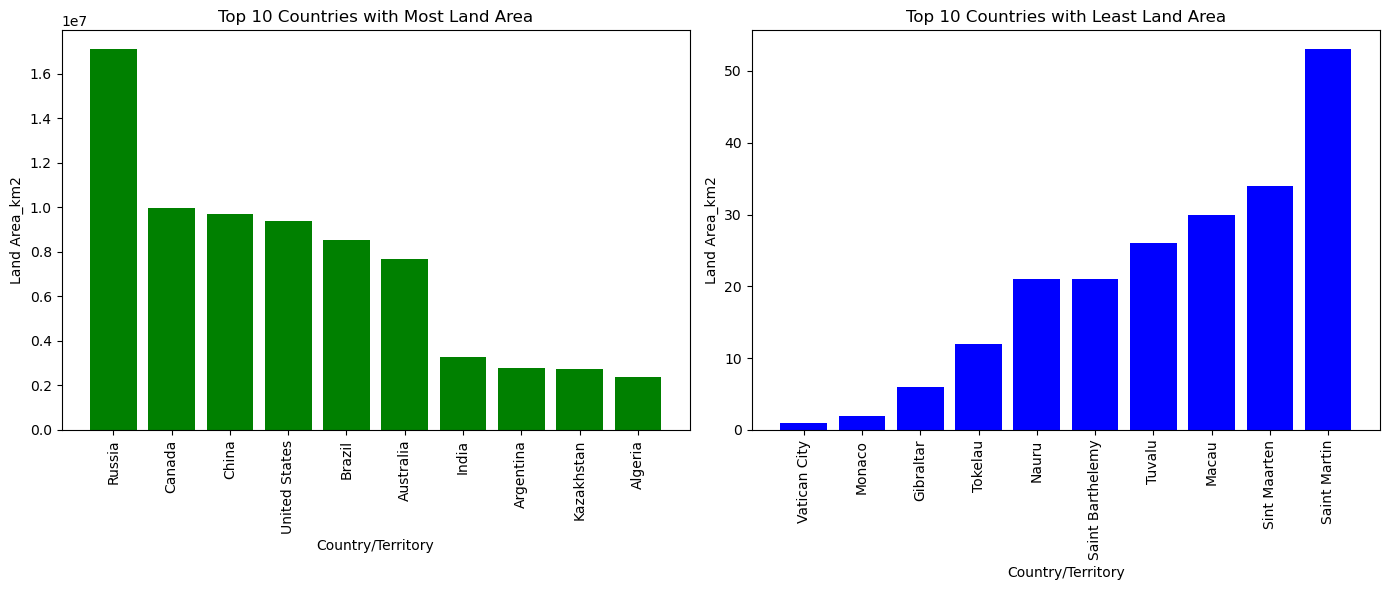

In [31]:
#Top 10 Countries with Most and Least Land Area
most_land_area = df.sort_values(by='Area_km2', ascending=False).head(10)
least_land_area = df.sort_values(by='Area_km2', ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(most_land_area['Country/Territory'], most_land_area['Area_km2'], color='green')
axes[0].set_title('Top 10 Countries with Most Land Area')
axes[0].set_xlabel('Country/Territory')
axes[0].set_ylabel('Land Area_km2')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(least_land_area['Country/Territory'], least_land_area['Area_km2'], color='blue')
axes[1].set_title('Top 10 Countries with Least Land Area')
axes[1].set_xlabel('Country/Territory')
axes[1].set_ylabel('Land Area_km2')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [32]:
#Prepare the Dataset for Prediction
df_predict = df[['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020', 'Population_2022']]
features = ['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020']
x = df_predict[features]
y = df_predict['Population_2022']

In [33]:
#Split the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)
print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)

Training data: (187, 7)
Testing data: (47, 7)


In [34]:
#Train the Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)
print("Model coefficients:", model.coef_)

Model coefficients: [-0.04164925  0.08594581 -0.03219461 -0.03771036  0.11722488 -0.63135566
  1.53149446]


In [35]:
#Evaluate the Model
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 224905.05391686954
Mean Squared Error (MSE): 377461288652.4225
R-squared (R²): 0.999884501355176


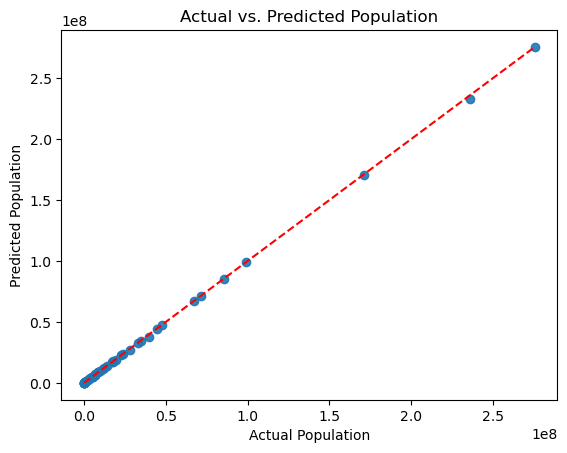

In [36]:
#Visualize the Prediction
plt.scatter(y_test, y_pred, alpha=0.9)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual vs. Predicted Population')
plt.show()